In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Autocorrelation
<font size=2>
In order to examine the existence of long-term and/or short-term repetitive patterns in time series data, we plot autocorrelation graph for some randomly selected variables from the datasets.

In [9]:
# show autocorrelation
def autocorrelation(x_data):
    # show data shape
    print("shape of dataset: {}".format(x_data.shape))
    # select some samples
    x_trial = x_data[:,:4].reshape(4,-1)
    plt.figure(figsize=(10,4))
    color = ['red','blue','green','yellow']
    for i,clr in zip(x_trial,color):
        # only show parts
        if len(i) > 300:
            i = i[:300]
        plt_x_axis = np.linspace(0,len(i),len(i))
        # calculate mean and var for correlation
        x_mean = np.mean(i)
        x_var = np.var(i)
        norm_x = i - x_mean
        acorr = np.correlate(norm_x, norm_x, 'full')[len(norm_x)-1:] 
        acorr = acorr / x_var / len(norm_x)
        plt.plot(plt_x_axis, acorr, color=clr, linewidth=1)
    plt.xlabel('time serial')
    plt.ylabel('correlation')
    plt.title('Autocorrelation')
    plt.show()

#### Traffic dataset
<font size=2>
The dataset is from paper:
    
  **Modeling Long- and Short-Term Temporal Patterns with Deep Neural Networks**

which is introduced as:
    
**A collection of 48 months (2015-2016) hourly data from the California Department of Transportation. The data describes the road occupancy rates (between 0 and 1) mea- sured by different sensors on San Francisco Bay area free-ways.**
    
The autocorrelation shows that traffic dataset has mutli-periodical patterns, which can be better learned by the **recurrsive-skip** part, which is newly proposed in paper.

shape of dataset: (17544, 862)


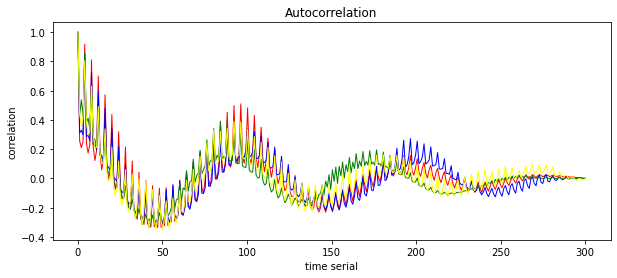

In [12]:
traffic_path = '/home/hardli/python/Fraunhofer KIT/Interview/LSTNet multivariate-time-series-data/multivariate-time-series-data/traffic/traffic.txt'
traffic_data = np.array(pd.read_csv(traffic_path,delimiter=',',header=None))
autocorrelation(traffic_data)

#### kiglis dataset
<font size=2>

The autocorrelation of kiglis dataset represents that kiglis doesn't have similar multi-periodical pattern as traffic dataset, rather resembles **rate-changing** case in paper, which is not feasible to predict with **recurrsive-skip** structure.

shape of dataset: (32768, 30)


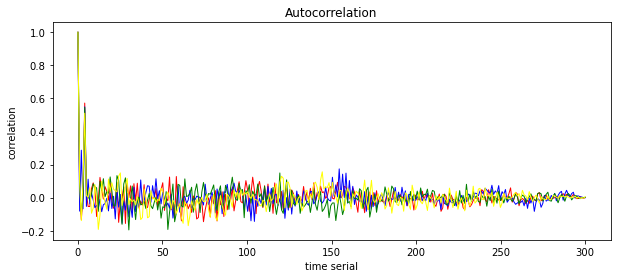

In [10]:
x_path = '/home/hardli/python/Fraunhofer KIT/Interview/kiglis/x_data.txt'
# header = None, and the first row of .txt will be included
x_data = np.array(pd.read_csv(x_path,delimiter=',',header=None))
autocorrelation(x_data)

shape of dataset: (32768, 30)


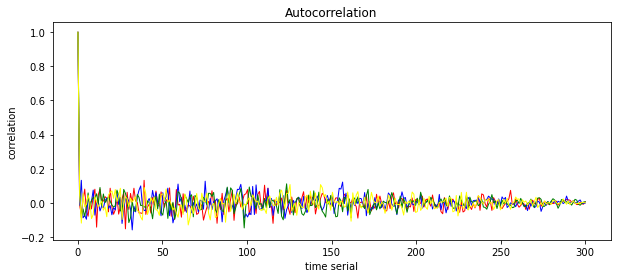

In [11]:
y_path = '/home/hardli/python/Fraunhofer KIT/Interview/kiglis/y_data.txt'
y_data = np.array(pd.read_csv(y_path,delimiter=',',header=None))
autocorrelation(y_data)